In [2]:
import numpy as np
import matplotlib.pyplot as plt
from models.training import easyTrainer, weights_to_dataset
from models.nODE import nODE, make_nODE_from_parameters
import scipy
import torch

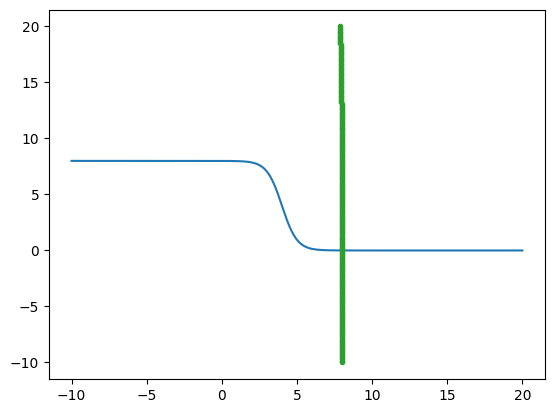

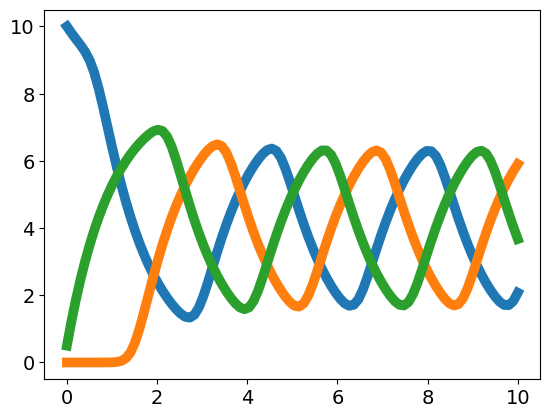

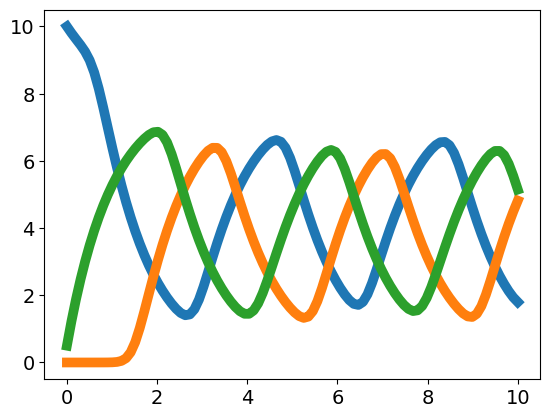

In [3]:
dim = 3
time_end = 10

gamma = - np.ones([dim])
Wout = 4 * np.eye(dim)
Win = np.zeros([dim, dim])
for i in range(1, dim):
    Win[i, i - 1] = -1
Win[0, dim - 1] = -1
bin, bout = 4 * np.ones([dim, 1]), 4 * np.ones([dim, 1])
# bin[2] = j

# knock down
# Win[1, :] = 0
# bout[1] = - np.tanh(bin[1]) * 4

Win_prime = Win.copy()
Win_prime[2, 0] = -0.1

node_3Drepr = make_nODE_from_parameters(gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)
node_3Drepr_prime = make_nODE_from_parameters(gamma, Win=Win_prime, bin=bin, Wout=Wout, bout=bout)

# 10,0,.50
traj = node_3Drepr.trajectory(torch.tensor([10,0,.50]), time_interval=[0,time_end], n_evals=time_end*10)
traj_prime = node_3Drepr_prime.trajectory(torch.tensor([10,0,.50]), time_interval=[0,time_end], n_evals=time_end*10)
# print(node_3Drepr)
# print(node_3Drepr_prime)

def x1(x3):
    return Wout[0,0] * np.tanh(Win[0, 2] * x3 + bin[0]) + bout[0]

def x3(x1):
    return Wout[2,2] * np.tanh(Win[2, 0] * x1 + bin[2]) + bout[2]

def x3_prime(x1):
    return Wout[2,2] * np.tanh(Win_prime[2, 0] * x1 + bin[2]) + bout[2]

x1_plot = np.linspace(-10, 20, 200)
x3_plot = np.linspace(-10, 20, 200)
plt.plot(x3_plot, x1(x3_plot))
plt.plot(x3(x1_plot), x1_plot)
plt.plot(x3_prime(x1_plot), x1_plot, '.')
plt.show()

time = np.linspace(0, time_end, traj.size()[0])
for i in range(traj.size()[1]):
    plt.plot(time[:], traj[:,i].detach().numpy(),linewidth=7.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('true_withoutKD')
plt.show()
for i in range(traj.size()[1]):
    plt.plot(time[:], traj_prime[:,i].detach().numpy(),linewidth=7.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('approx_withoutKD')
plt.show()

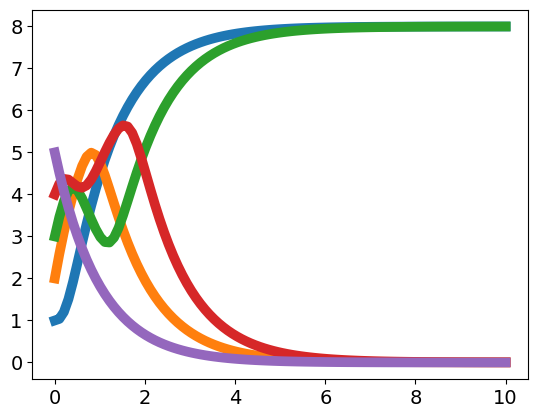

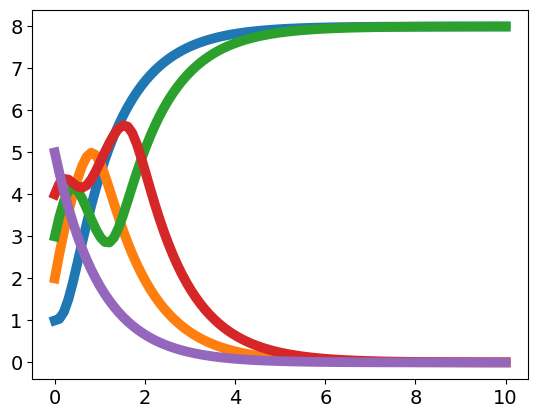

In [57]:
epsilon = 10**-5
dim = 5
time_end = 10

gamma = - np.ones([dim])
Wout = 4*np.eye(dim)
Win = np.zeros([dim, dim])
for i in range(1, dim):
    Win[i, i - 1] = -1
Win[0, dim - 1] = -1
bin, bout = 4 * np.ones([dim, 1]), 4 * np.ones([dim, 1])

# bin[2] = 0.4

# knock down
Win[4, :] = 0
bout[4] = - np.tanh(bin[1]) * 4

Win_prime = Win.copy()
Win_prime[2, 0] = -np.abs(epsilon)

node_5Drepr = make_nODE_from_parameters(gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)
node_5Drepr_prime = make_nODE_from_parameters(gamma, Win=Win_prime, bin=bin, Wout=Wout, bout=bout)

# 10,0,.50
x0 = torch.tensor([1,2,3,4,5.])
# if starting point not symmetric, doesn't converge to any equilibrium but to periodic orbit as expected
traj = node_5Drepr.trajectory(x0, time_interval=[0,time_end], n_evals=time_end*10)
traj_prime = node_5Drepr_prime.trajectory(x0, time_interval=[0,time_end], n_evals=time_end*10)
# print(node_3Drepr)
# print(node_3Drepr_prime)

time = np.linspace(0, time_end, traj.size()[0])
for i in range(traj.size()[1]):
    plt.plot(time[:], traj[:,i].detach().numpy(),linewidth=7.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.savefig('true_withoutKD')
plt.show()
for i in range(traj.size()[1]):
    plt.plot(time[:], traj_prime[:,i].detach().numpy(),linewidth=7.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.savefig('approx_withoutKD')
plt.show()

Knock down by repressing the second gene (aka setting b_out[2] large and negative)

In [46]:
traj_prime.size()

torch.Size([100, 1, 5])

In [41]:
Win_prime

array([[ 0.e+00,  0.e+00,  0.e+00,  0.e+00, -1.e+00],
       [-1.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00],
       [-1.e-05, -1.e+00,  0.e+00,  0.e+00,  0.e+00],
       [ 0.e+00,  0.e+00, -1.e+00,  0.e+00,  0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, -1.e+00,  0.e+00]])

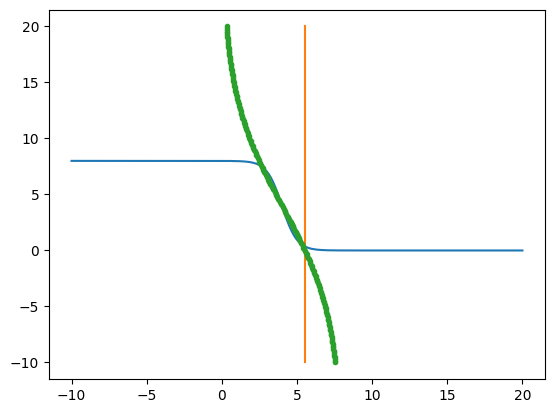

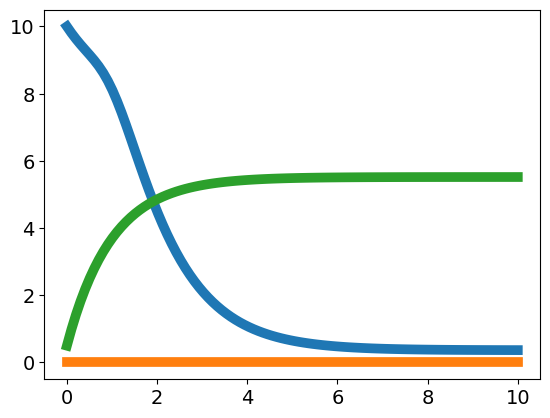

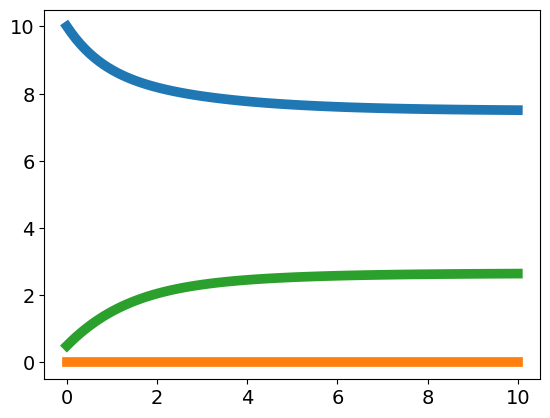

In [389]:
bin[2] = 0.4

# knock down
Win[1, :] = 0
bout[1] = - np.tanh(bin[1]) * 4

Win_prime = Win.copy()
Win_prime[2, 0] = -0.1

node_3Drepr = make_nODE_from_parameters(gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)
node_3Drepr_prime = make_nODE_from_parameters(gamma, Win=Win_prime, bin=bin, Wout=Wout, bout=bout)

traj = node_3Drepr.trajectory(torch.tensor([10,0,.50]), time_interval=[0,time_end], n_evals=time_end*10)
traj_prime = node_3Drepr_prime.trajectory(torch.tensor([10,0,.50]), time_interval=[0,time_end], n_evals=time_end*10)

def x1(x3):
    return Wout[0,0] * np.tanh(Win[0, 2] * x3 + bin[0]) + bout[0]

def x3(x1):
    return Wout[2,2] * np.tanh(Win[2, 0] * x1 + bin[2]) + bout[2]

def x3_prime(x1):
    return Wout[2,2] * np.tanh(Win_prime[2, 0] * x1 + bin[2]) + bout[2]

x1_plot = np.linspace(-10, 20, 200)
x3_plot = np.linspace(-10, 20, 200)
plt.plot(x3_plot, x1(x3_plot))
plt.plot(x3(x1_plot), x1_plot)
plt.plot(x3_prime(x1_plot), x1_plot, '.')
plt.show()

time = np.linspace(0, time_end, traj.size()[0])
for i in range(traj.size()[1]):
    plt.plot(time[:], traj[:,i].detach().numpy(),linewidth=7.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('true_withKD')
plt.show()
for i in range(traj.size()[1]):
    plt.plot(time[:], traj_prime[:,i].detach().numpy(),linewidth=7.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('approx_withKD')
plt.show()

pretty sphere projection

In [478]:
def plot_circle(center=[0,0], radius = 1, color = None, linewidth=1.):
    t= np.linspace(0, 2*np.pi, 60)
    if color:
        plt.plot(center[0] + radius * np.sin(t), center[1] + radius * np.cos(t), color = color, linewidth=linewidth)
    else:
        plt.plot(center[0] + radius * np.sin(t), center[1] + radius * np.cos(t), linewidth=linewidth)

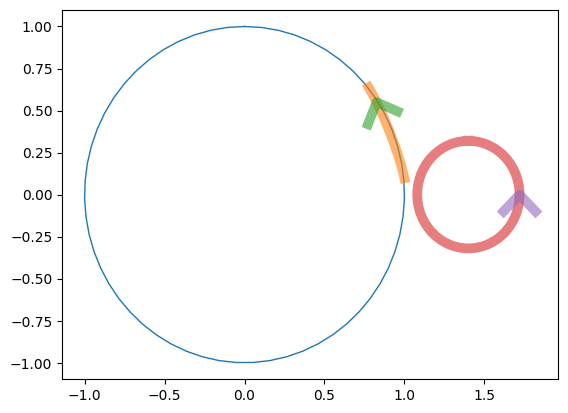

In [560]:
alpha_const = 0.6

def plot_arch(p1, p2, color=None):
    # assume p1 and p2 are on the boundary of the circle
    if all( p1 == p2):
        self_edge(p1, color = color)
        return
    center = (p1 + p2)/2
    x_radius = p1[0]-center[0]
    y_radius = p1[1]-center[1]
    direction = p1 - center
    radius = np.linalg.norm(direction)
    direction = direction / radius
    t_plot = np.linspace(.7, np.pi-.7, 60)
    perpendicular = np.array([direction[1], -direction[0]])
    perturbation_x = center[0] + np.cos(t_plot) * radius * direction[0] + 0.15 * np.sin(t_plot) * perpendicular[0] * radius
    perturbation_y = center[1] + np.cos(t_plot) * radius * direction[1] + 0.15 * np.sin(t_plot) * perpendicular[1] * radius
    
    middle = center + np.cos(np.pi * 2/3) * direction * radius + 0.15 * np.sin(np.pi  * 2/3) * perpendicular * radius
    arrow = 0.1 * np.array([-perpendicular + direction, 0*direction, perpendicular + direction]) + middle
    
    if color is not None:
        plt.plot(perturbation_x, perturbation_y, linewidth=7.0, color = color, alpha=alpha_const)
        plt.plot(arrow[:,0], arrow[:,1], linewidth=7.0, color = color,alpha=alpha_const)
    else:
        plt.plot(perturbation_x, perturbation_y, linewidth=7.0, alpha=alpha_const)
        plt.plot(arrow[:,0], arrow[:,1], linewidth=7.0, alpha=alpha_const)
    return

def self_edge(p, color = None):
    size = 0.4
    center = (1+size) * p
    radius = 0.8 * size * np.linalg.norm(p)
    t = np.linspace(0, 2*np.pi-0, 60)

    direction = center + radius * center / np.linalg.norm(center)
    radius_arrow = np.linalg.norm(direction)
    direction = direction / radius_arrow
    perpendicular = np.array([direction[1], -direction[0]])
    middle = center + radius * center / np.linalg.norm(center)
    arrow = 0.1 * np.array([perpendicular - direction, 0*direction, perpendicular + direction]) + middle
    
    if color is None:
        plt.plot(center[0] + radius * np.sin(t), center[1] + radius * np.cos(t), linewidth=7.0, alpha=alpha_const)
        plt.plot(arrow[:,0], arrow[:,1], linewidth=7.0, alpha=alpha_const)
    else:
        plt.plot(center[0] + radius * np.sin(t), center[1] + radius * np.cos(t), linewidth=7.0, color = color, alpha=alpha_const)
        plt.plot(arrow[:,0], arrow[:,1], linewidth=7.0, color = color,alpha=alpha_const)
        
    return

plot_circle()
plot_arch(np.array([1,1])/np.sqrt(2), np.array([1,0.]))
plot_arch(np.array([1,0.]), np.array([1,0.]))

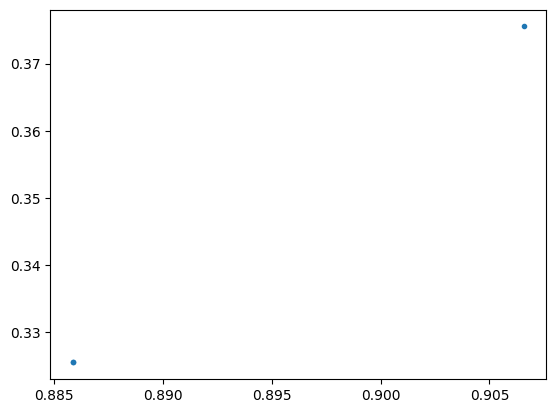

In [534]:
arrow = np.array([[0.88587572, 0.32552038],
 [0.9065864,  0.37552038],
 [0.88587572, 0.32552038]])
plt.plot(arrow[:,0], arrow[:,1], '.')

In [535]:
def define_nodes(n_nodes):
    y = np.cos(2*np.pi/n_nodes * np.linspace(0, n_nodes, n_nodes+1)[1:])
    x = np.sin(2*np.pi/n_nodes * np.linspace(0, n_nodes, n_nodes+1)[1:])
    return np.array([x,y])

In [536]:
def plot_nodes(ax, xy):
    for i in range(np.shape(xy)[1]):
        plot_node(ax, xy[:,i], number = str(i))

def plot_node(ax, node, number=None):
    #circle1 = plt.Circle(node, 0.1, color='r')
    #ax.add_patch(circle1)
    #circle1 = plt.Circle(node, 0.1, fill=False, edgecolor='k')
    #ax.add_patch(circle1)
    plot_circle(center=node, radius = 0.1, color = 'b', linewidth= 21.0)
    if number:
        plt.text(node[0]-0.04, node[1]-0.04, number, color = 'w', size= 'x-large', fontweight='bold')

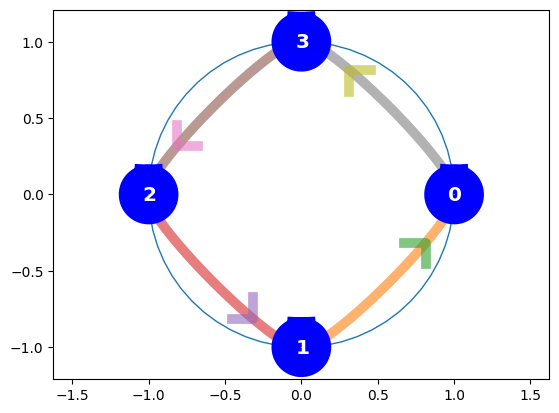

In [546]:
n_nodes = 4
xy = define_nodes(n_nodes)
fig = plt.gcf()
ax = fig.gca()
plot_circle()
for i in range(n_nodes-1):
    plot_arch(xy[:,i], xy[:,i+1])
plot_arch(xy[:,-1], xy[:,0])
plot_nodes(ax, xy)
plt.axis('equal')
plt.show()

In [540]:
def plot_graph(adj):
    n_nodes = np.shape(adj)[0]
    xy = define_nodes(n_nodes)
    for i in range(n_nodes):
        for j in range(n_nodes):
            if adj[i,j] < 0:
                plot_arch(xy[:,i], xy[:,j], color = 'r')
            elif adj[i,j] > 0:
                plot_arch(xy[:,i], xy[:,j], color = 'g')
    ax = plt.gca()
    plot_nodes(ax, xy)
    
    return

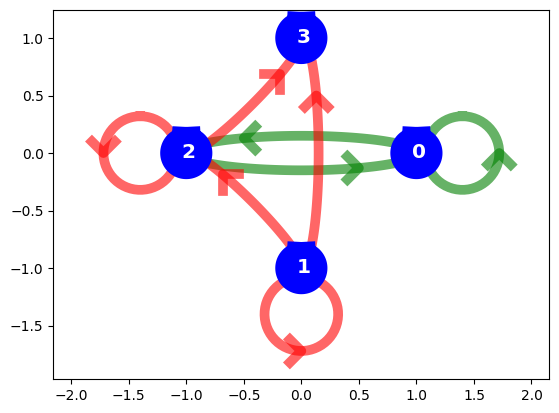

In [561]:
Adjacency = np.array([[1, 0, 1, 0],[0, -1, 0, 0],[1, -1, -1, 0], [0, -1, -1, 0]])
plot_graph(Adjacency)
plt.axis('equal')
plt.show()

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def repressilator(x, gamma, ell, delta, scale, theta):
    y = 0 * x
    for i in range(len(x)):
        y[i] = - gamma * x[i] + ell + delta * np.tanh( scale * (x[np.mod(i+1, len(x))] - theta))
    return y


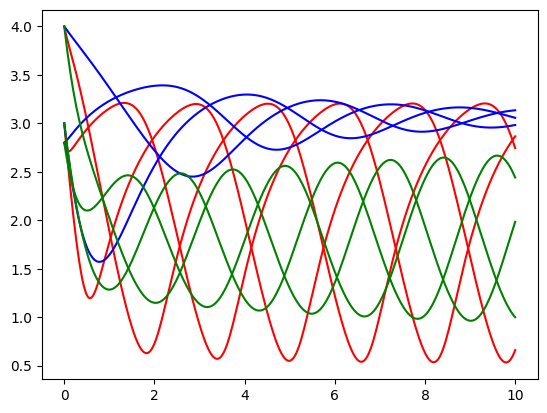

In [71]:
T = np.linspace(0., 10., 300)
x0 = np.array([4.,2.8,3.])

gamma, ell, delta, scale, theta = 1., 0.5, 3., -2., 3
repr = lambda x, t : repressilator(x, gamma, ell, delta, scale, theta)

sol = odeint(repr, x0, T)

plt.plot(T, sol[:,0], T, sol[:,1], T, sol[:, 2], color = 'r')
#plt.show()

gamma, ell, delta, scale, theta = 1., 0.5, 3., -2., 3.7
repr = lambda x, t : repressilator(x, gamma, ell, delta, scale, theta)

sol = odeint(repr, x0, T)

plt.plot(T, sol[:,0], T, sol[:,1], T, sol[:, 2], color = 'b')
#plt.show()

gamma, ell, delta, scale, theta = 1., 2, 3., -.75, 1.7
# gamma, ell, delta, scale, theta = 1., 0.5, 3., -2., 2.3
repr = lambda x, t : repressilator(x, gamma, ell, delta, scale, theta)

sol = odeint(repr, x0, T)

plt.plot(T, sol[:,0], T, sol[:,1], T, sol[:, 2], color = 'g')
plt.show()